In [1]:
# To support python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# To plot pretty figures
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To make output stable across all runs
np.random.seed(42)
    
# Ignore useless warning
import warnings
warnings.filterwarnings(action='ignore', message="^internal gelsd")

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [4]:
train.shape

(4990, 13)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_Price'}>,
        <AxesSubplot:title={'center':'Store_Start_Year'}>],
       [<AxesSubplot:title={'center':'Item_Store_Returns'}>,
        <AxesSubplot:>]], dtype=object)

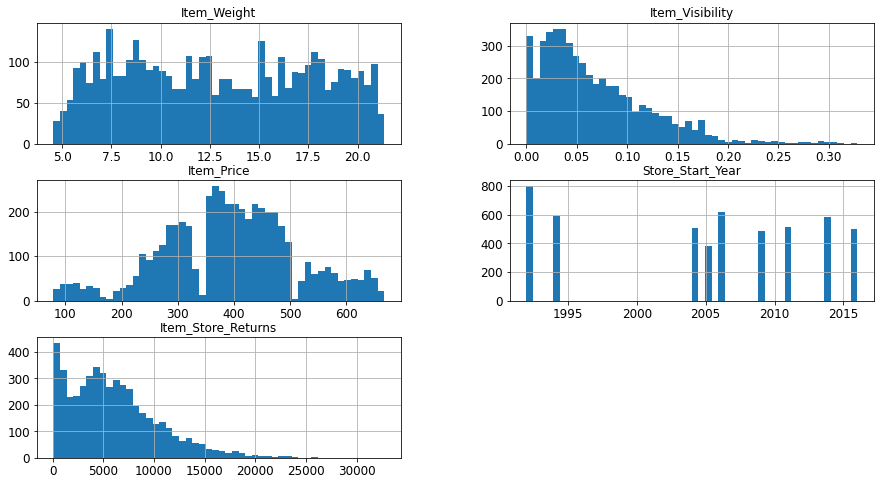

In [7]:
train.hist(bins=50, figsize=(15, 8))

The data is more scaled to the right than to the left

In [8]:
train.isna().sum()


Item_ID                   0
Store_ID                  0
Item_Store_ID             0
Item_Weight             802
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size             1450
Store_Location_Type       0
Store_Type                0
Item_Store_Returns        0
dtype: int64

In [9]:
#Checking for correlation

corr_matrix = train.corr()
corr_matrix['Item_Store_Returns'].sort_values(ascending=False)

Item_Store_Returns    1.000000
Item_Price            0.518285
Store_Start_Year      0.051297
Item_Weight           0.015322
Item_Visibility      -0.164943
Name: Item_Store_Returns, dtype: float64

# Preparing Data For Machine Learning Algorithm

In [10]:
from sklearn import preprocessing

# Concatinating train and test for easy featuring
ntrain = train.shape[0]
ntest = test.shape[0]

# Get data target variable
lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(train['Item_Store_Returns'])

all_data = pd.concat((train, test)).reset_index(drop=True)

# Drop Target variable
all_data.drop(['Item_Store_Returns'], axis=1, inplace=True)

print("Total data size is: {}".format(all_data.shape))

Total data size is: (8522, 12)


In [11]:
# Dealing with missing values with scikit-learn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

# Since median only compute numerical attributes,create
# a copy of the data without text attibute(ocean_proximity)
all_data_cat = [column for column in all_data.columns if all_data[column].dtypes == 'O']
for i in range(len(all_data_cat)):
    all_data_num = all_data.drop(all_data_cat, axis=1)
    
# fit the imputer instance to the training data set
imputer.fit(all_data_num)

SimpleImputer(strategy='median')

In [12]:
imputer.statistics_

array([1.26000000e+01, 5.39351245e-02, 3.57450000e+02, 2.00600000e+03])

In [13]:
all_data_num.median().values

array([1.26000000e+01, 5.39351245e-02, 3.57450000e+02, 2.00600000e+03])

In [14]:
# Use the trained imputer to transform the training set by replacing missing values with the learned median
X = imputer.transform(all_data_num)

In [15]:
# Convert back to Pandas Dataframe
all_data_tr = pd.DataFrame(X, columns=all_data_num.columns)

In [16]:
# Handling Text and Categorical Attributes
missing_cat = [var for var in all_data.columns if all_data[var].dtypes=='O' and all_data[var].isnull().mean()>0]
missing_cat

['Store_Size']

In [17]:
for i in missing_cat:
    all_data[i].fillna(all_data[i].mode()[0], inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
all_data_cat_encoded = encoder.fit_transform(all_data_cat)
all_data_cat_encoded

array([0, 4, 1, 2, 3, 6, 5, 7], dtype=int64)

In [19]:
print(encoder.classes_)

['Item_ID' 'Item_Store_ID' 'Item_Sugar_Content' 'Item_Type' 'Store_ID'
 'Store_Location_Type' 'Store_Size' 'Store_Type']


In [20]:
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, StandardScaler

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(all_data_cat_encoded.reshape(-1, 1))
housing_cat_1hot

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [22]:
from sklearn.pipeline import Pipeline

num_attribs = list(all_data_num)
cat_attribs = all_data_cat

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [23]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [24]:
all_data_prepared = full_pipeline.fit_transform(all_data)
all_data_prepared

array([[-0.28695608,  0.04652692,  0.032555  , ...,  0.        ,
         0.        ,  0.        ],
       [-0.28695608, -0.488834  ,  0.02131432, ...,  1.        ,
         0.        ,  0.        ],
       [-0.28695608, -0.48368488, -0.01080188, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.54718538, -1.06262963,  1.51805814, ...,  1.        ,
         0.        ,  0.        ],
       [-0.76010026, -0.48771121,  0.76647461, ...,  0.        ,
         0.        ,  0.        ],
       [-0.76010026, -0.80774613,  0.73275259, ...,  1.        ,
         0.        ,  0.        ]])

In [25]:
train = all_data_prepared[:ntrain]
test = all_data_prepared[ntrain:]

print('Train shape: {}-------Test shape: {}'.format(train.shape, test.shape))

Train shape: (4990, 10124)-------Test shape: (3532, 10124)


# Select and Train a Model

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

#lin_reg = LinearRegression()
#lin_reg.fit(X_train, y_train)

for_reg = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
for_reg.fit(X_train, y_train)

#svm_reg = svm.SVR(kernel='linear')
#svm_reg.fit(X_train, y_train)

#tree_reg = DecisionTreeRegressor(random_state=42)
#tree_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1)

In [28]:
#lin_reg.score(X_test, y_test) = 0.49
for_reg.score(X_test, y_test)
#svm_reg.score(X_test, y_test) = 0.53
#tree_reg.score(X_test, y_test) = 0.53
#log_reg.score(X_test, y_test)

0.5347145929742522

In [29]:
some_data = train[:20]
#lin_reg.predict(some_data)
#svm_reg.predict(some_data)
for_reg.predict(some_data)

array([ 198.712, 1402.445, 1334.156,  699.372,  929.41 , 1685.14 ,
        248.06 , 1832.969, 1592.542,  318.121, 2254.267, 1715.701,
       1539.802, 1495.139, 1875.97 ,  358.108, 2561.903, 1565.96 ,
       1164.493, 2545.6  ])

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gbrt = GradientBoostingRegressor(max_depth=2, learning_rate=0.1, warm_start=True)

min_val_err = float('inf')
error_going_up = 0
for n_estimators in range(1, 2000):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_test)
    val_err = mean_squared_error(y_test, y_pred)
    if val_err < min_val_err:
        min_val_err = val_err
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 30:
            break # early stopping

In [31]:
gbrt.score(X_test, y_test)

0.5778111483566177

In [48]:
# Loading submission dataset
submission = pd.read_csv('sample_submission.csv')
submission.head()

,user_id,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0
1,5335efd940280b82143272275637d1e65d37eadb,0
2,a581f4fa08677c26f83f643248c667e241043086,0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,0


In [49]:
y_pred1.shape

(100000,)

In [50]:
submission['CHURN'] = y_pred1[0]

In [51]:
submission.to_csv('sixth_submission.csv', index=False)

In [52]:
sub = pd.read_csv('sixth_submission.csv')
sub.head()

,user_id,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0.765723
1,5335efd940280b82143272275637d1e65d37eadb,0.765723
2,a581f4fa08677c26f83f643248c667e241043086,0.765723
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,0.765723
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,0.765723
